# 텐서플로의 동작을 확인하는 프로그램

In [1]:
import tensorflow as tf

print(tf.__version__) # 버전 확인
a=tf.random.uniform([2,3],0,1) # 0~1 사이의 난수로 2*3 행렬 생성
print(a)
print(type(a))

2.8.0
tf.Tensor(
[[0.26374352 0.30620337 0.98479843]
 [0.88675964 0.12162721 0.41935337]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


# 텐서플로와 넘파이의 호환을 확인하는 프로그램

## 딥러닝에서 텐서
* 다차원 배열을 텐서라고 부른다
    * 데이터를 텐서로 표현
    * 신경마의 가중치(매개변수)를 텐서로 표현
* 넘파이는 ndarray클래스, 텐서플로는 Tensor 클래스로 표현. 둘은 호환 됨

In [3]:
import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])
print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray:\n",n,"\n")

res=t+n # 텐서 t와 ndarray n의 덧셈
print("덧셈 결과:\n",res)

tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.99046683 0.7045773  0.46938908]
 [0.8341478  0.50493884 0.46503747]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.24989353 0.74371343 0.57174305]
 [0.16314389 0.26658504 0.76448616]] 

덧셈 결과:
 tf.Tensor(
[[1.2403604 1.4482908 1.0411322]
 [0.9972917 0.7715239 1.2295237]], shape=(2, 3), dtype=float32)


# 텐서플로가 제공하는 데이터셋의 텐서 구조

In [6]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

# MNIST 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test)=ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("MNIST: ", x_train.shape,y_train.shape,yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test)=ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10: ", x_train.shape,y_train.shape,yy_train.shape)

# Boston Housing 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test)=ds.boston_housing.load_data()
print("Boston Housing: ", x_train.shape,y_train.shape)

# Reuters 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test)=ds.reuters.load_data()
print("Reuters: ", x_train.shape,y_train.shape)



MNIST:  (60000, 28, 28) (60000,) (60000, 10)
CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
Boston Housing:  (404, 13) (404,)
Reuters:  (8982,) (8982,)


# 학습된 퍼셉트론의 동작을 확인하는 프로그램

In [8]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

w=tf.Variable([[1.0],[1.0]]) # 가중치
b=tf.Variable(-0.5) # 바이아스

s=tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


# 퍼셉트론을 학습하는 프로그램

In [9]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 가중치 초기화
w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b=tf.Variable(tf.zeros([1])) # bias

#옵티마이저
opt=tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent

#전방계산식
def forward():
    s=tf.add(tf.matmul(x,w),b)
    o=tf.tanh(s) # 하이퍼볼릭 탄젠트 적용 -> -1~1 사이의 값
    return o

#손실 함수 정의
def loss():
    o=forward()
    return tf.reduce_mean((y-o)**2) # mse 방식(Mean Squared Error)

#500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
    opt.minimize(loss, var_list=[w,b]) # w, b 를 가지고 loss를 최소화
    if(i%100==0): print('loss at epoch',i,'=',loss().numpy())

# 학습된 퍼셉트론으로 OR 데이터를 예측
o=forward()
print(o)

loss at epoch 0 = 0.5251347
loss at epoch 100 = 0.0845488
loss at epoch 200 = 0.040490996
loss at epoch 300 = 0.025822455
loss at epoch 400 = 0.018735478
tf.Tensor(
[[-0.8178387 ]
 [ 0.8872362 ]
 [ 0.88733035]
 [ 0.99928534]], shape=(4, 1), dtype=float32)


# Keras 프로그래밍
## 위 프로그램의 문제점
* 신경망의 동작을 직접 코딩해야 함
* keras는 이런 부담을 덜기 위해 탄생

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 신경망 구조 설계
n_input=2
n_output=1

perceptron=Sequential() # 객체 생성
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),
        kernel_initializer='random_uniform',bias_initializer='zeros')) # add로 Dense(완전연결)층을 쌓음

# 신경망 학습
perceptron.compile(loss='mse', 
    optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x) # 학습된 신경망으로 x 예측
print(res)


Epoch 1/500
1/1 - 0s - loss: 0.9957 - mse: 0.9957 - 294ms/epoch - 294ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7482 - mse: 0.7482 - 3ms/epoch - 3ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6395 - mse: 0.6395 - 4ms/epoch - 4ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5861 - mse: 0.5861 - 3ms/epoch - 3ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5537 - mse: 0.5537 - 3ms/epoch - 3ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5305 - mse: 0.5305 - 4ms/epoch - 4ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5118 - mse: 0.5118 - 4ms/epoch - 4ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4955 - mse: 0.4955 - 3ms/epoch - 3ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4807 - mse: 0.4807 - 5ms/epoch - 5ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4670 - mse: 0.4670 - 6ms/epoch - 6ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4539 - mse: 0.4539 - 3ms/epoch - 3ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4414 - mse: 0.4414 - 5ms/epoch - 5ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4294 - mse: 0.4294 - 4ms/epoch - 4ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4179 - mse:

# 다층 퍼셉트론으로 MNIST 인식하는 프로그램

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) 
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # [0,1]범위로 정규화
x_test=x_test.astype(np.float32)/255.0 
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설계
n_input=784 # 입력층
n_hidden=1024 # 은닉층
n_output=10 # 출력층

mlp=Sequential() # Sequential 모델 생성
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 3s - loss: 0.0426 - accuracy: 0.8451 - val_loss: 0.0285 - val_accuracy: 0.9105 - 3s/epoch - 7ms/step
Epoch 2/30
469/469 - 3s - loss: 0.0225 - accuracy: 0.9283 - val_loss: 0.0187 - val_accuracy: 0.9429 - 3s/epoch - 7ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0167 - accuracy: 0.9477 - val_loss: 0.0156 - val_accuracy: 0.9525 - 3s/epoch - 6ms/step
Epoch 4/30
469/469 - 3s - loss: 0.0139 - accuracy: 0.9567 - val_loss: 0.0130 - val_accuracy: 0.9597 - 3s/epoch - 6ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0121 - accuracy: 0.9637 - val_loss: 0.0122 - val_accuracy: 0.9599 - 3s/epoch - 7ms/step
Epoch 6/30
469/469 - 3s - loss: 0.0110 - accuracy: 0.9674 - val_loss: 0.0111 - val_accuracy: 0.9647 - 3s/epoch - 7ms/step
Epoch 7/30
469/469 - 4s - loss: 0.0101 - accuracy: 0.9711 - val_loss: 0.0109 - val_accuracy: 0.9663 - 4s/epoch - 8ms/step
Epoch 8/30
469/469 - 3s - loss: 0.0095 - accuracy: 0.9736 - val_loss: 0.0101 - val_accuracy: 0.9674 - 3s/epoch - 7ms/step
Epoch 9/30
469/469 - 3s 

# 학습 곡선을 시각화 하는 프로그램
* hist 객체가 가진 정보를 이용하여 학습 곡선을 그림

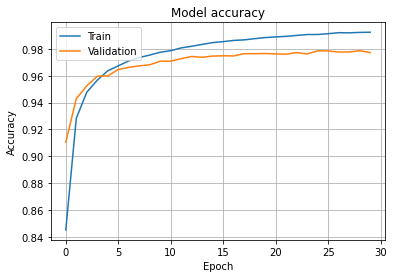

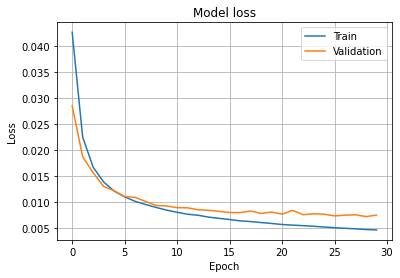

In [15]:
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy']) # hist.history(key-value형태)의 key값이 'accuracy'인 value를 가져와서 그래프를 그린다
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()


# fashion MNIST를 인식하는 프로그램

Epoch 1/30
469/469 - 3s - loss: 0.0990 - accuracy: 0.4935 - val_loss: 0.0327 - val_accuracy: 0.8280 - 3s/epoch - 7ms/step
Epoch 2/30
469/469 - 3s - loss: 0.0300 - accuracy: 0.8456 - val_loss: 0.0277 - val_accuracy: 0.8429 - 3s/epoch - 6ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0270 - accuracy: 0.8588 - val_loss: 0.0275 - val_accuracy: 0.8510 - 3s/epoch - 6ms/step
Epoch 4/30
469/469 - 3s - loss: 0.0249 - accuracy: 0.8677 - val_loss: 0.0250 - val_accuracy: 0.8601 - 3s/epoch - 6ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0234 - accuracy: 0.8757 - val_loss: 0.0253 - val_accuracy: 0.8594 - 3s/epoch - 6ms/step
Epoch 6/30
469/469 - 3s - loss: 0.0224 - accuracy: 0.8814 - val_loss: 0.0253 - val_accuracy: 0.8611 - 3s/epoch - 6ms/step
Epoch 7/30
469/469 - 3s - loss: 0.0216 - accuracy: 0.8864 - val_loss: 0.0229 - val_accuracy: 0.8708 - 3s/epoch - 6ms/step
Epoch 8/30
469/469 - 3s - loss: 0.0206 - accuracy: 0.8898 - val_loss: 0.0217 - val_accuracy: 0.8721 - 3s/epoch - 6ms/step
Epoch 9/30
469/469 - 3s 

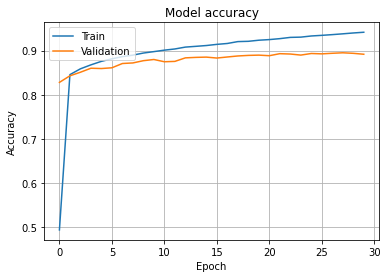

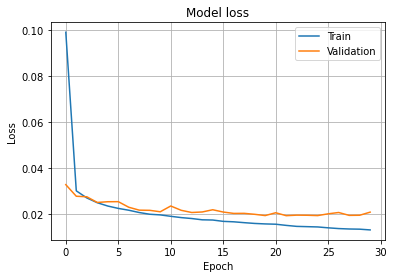

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) 
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # [0,1]범위로 정규화
x_test=x_test.astype(np.float32)/255.0 
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설계
n_input=784 # 입력층
n_hidden=1024 # 은닉층
n_output=10 # 출력층

mlp=Sequential() # Sequential 모델 생성
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

# 정확률 곡선
plt.plot(hist.history['accuracy']) # hist.history(key-value형태)의 key값이 'accuracy'인 value를 가져와서 그래프를 그린다
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()



# 깊은 다층 퍼셉트론으로 MNIST인식

Epoch 1/30
469/469 - 9s - loss: 0.0263 - accuracy: 0.8945 - val_loss: 0.0135 - val_accuracy: 0.9454 - 9s/epoch - 18ms/step
Epoch 2/30
469/469 - 8s - loss: 0.0100 - accuracy: 0.9541 - val_loss: 0.0083 - val_accuracy: 0.9591 - 8s/epoch - 17ms/step
Epoch 3/30
469/469 - 8s - loss: 0.0066 - accuracy: 0.9678 - val_loss: 0.0062 - val_accuracy: 0.9676 - 8s/epoch - 16ms/step
Epoch 4/30
469/469 - 8s - loss: 0.0053 - accuracy: 0.9742 - val_loss: 0.0058 - val_accuracy: 0.9708 - 8s/epoch - 16ms/step
Epoch 5/30
469/469 - 8s - loss: 0.0042 - accuracy: 0.9799 - val_loss: 0.0047 - val_accuracy: 0.9753 - 8s/epoch - 16ms/step
Epoch 6/30
469/469 - 8s - loss: 0.0036 - accuracy: 0.9832 - val_loss: 0.0048 - val_accuracy: 0.9739 - 8s/epoch - 16ms/step
Epoch 7/30
469/469 - 8s - loss: 0.0031 - accuracy: 0.9860 - val_loss: 0.0049 - val_accuracy: 0.9734 - 8s/epoch - 16ms/step
Epoch 8/30
469/469 - 8s - loss: 0.0030 - accuracy: 0.9859 - val_loss: 0.0044 - val_accuracy: 0.9768 - 8s/epoch - 16ms/step
Epoch 9/30
469/4

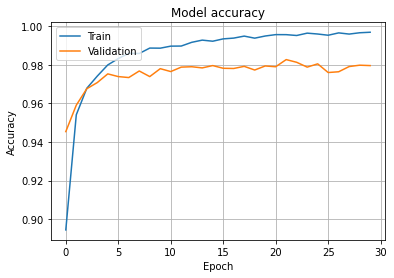

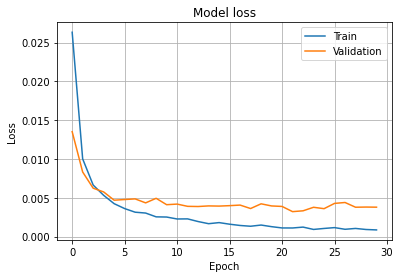

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
# ouput의 개수가 다음 층의 input 개수 이므로 처음에만 input_shape를 설정 한다
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망의 정확률 측정
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

# 가중치 초기화 방법
* kernel_initializer='random_uniform' 으로 설정 -> 균일 분포에서 난수를 생성하여 가중치를 초기화 함
* kernel_initializer의 default는 'glorot_uniform' 이다
* glorot_uniform이 보통 우수한 성능을 제공한다고 알려짐
* glorot_uniform : 랜덤으로 값을 설정하지만, 레이어의 출력 분산을 입력의 분산과 동일하게 만든다

# 딥러닝의 층이 깊어지면 현실적인 문제가 발생
## 그레이디언트 소멸 문제
* I번째 층의 그레이디언트는 오른쪽에 있는 I+1번째 층의 그레이디언트에 자신 층에서 발생한 그레이디언트를 곱하여 구함
* 따라서 그레이디언트가 0.001처럼 작은 경우 왼쪽으로 진행하면서 점점 작아짐
* 왼쪽으로 갈수록 가중치 갱신이 느려져서 전체 신경망의 학습이 매우 느린 현상이 발생
> 병렬 처리로 해결
* GPU/TPU 사용 
> ReLU 함수를 사용하여 해결
* Tanh(s) 시그모이드 함수의 문제점
    * s가 클 때 그레이디언트가 0에 가까워짐
* ReLU는 s가 음수일 때 그레이디언트는 0, 양수일 때 1


## 과잉 적합 문제
> 딥러닝의 과잉 적합 회피 전략
* 데이터 양을 늘림. 데이터 양을 늘릴 수 없는 상황에서는 훈련 샘플을 변형하여 인위적으로 늘리는 데이터 증대 사용

# 손실 함수의 성능 비교 실험
## 평균제곱오차(MSE)와 교차 엔트로피를 비교하는 프로그램

Epoch 1/30
469/469 - 8s - loss: 0.0162 - accuracy: 0.8936 - val_loss: 0.0101 - val_accuracy: 0.9344 - 8s/epoch - 18ms/step
Epoch 2/30
469/469 - 8s - loss: 0.0097 - accuracy: 0.9376 - val_loss: 0.0083 - val_accuracy: 0.9475 - 8s/epoch - 17ms/step
Epoch 3/30
469/469 - 9s - loss: 0.0075 - accuracy: 0.9517 - val_loss: 0.0069 - val_accuracy: 0.9555 - 9s/epoch - 18ms/step
Epoch 4/30
469/469 - 8s - loss: 0.0060 - accuracy: 0.9621 - val_loss: 0.0064 - val_accuracy: 0.9577 - 8s/epoch - 18ms/step
Epoch 5/30
469/469 - 8s - loss: 0.0050 - accuracy: 0.9685 - val_loss: 0.0054 - val_accuracy: 0.9642 - 8s/epoch - 18ms/step
Epoch 6/30
469/469 - 8s - loss: 0.0043 - accuracy: 0.9738 - val_loss: 0.0048 - val_accuracy: 0.9694 - 8s/epoch - 18ms/step
Epoch 7/30
469/469 - 9s - loss: 0.0037 - accuracy: 0.9784 - val_loss: 0.0045 - val_accuracy: 0.9703 - 9s/epoch - 19ms/step
Epoch 8/30
469/469 - 9s - loss: 0.0031 - accuracy: 0.9815 - val_loss: 0.0043 - val_accuracy: 0.9709 - 9s/epoch - 19ms/step
Epoch 9/30
469/4

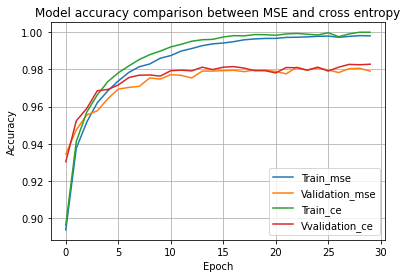

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 평균제곱오차를 사용한 모델
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

#교차 엔트로피를 사용한 모델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add(Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce=dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 두 모델의 정확률 비교
res_mse=dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오차의 정확률은",res_mse[1]*100)

res_ce=dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("교차 엔트로피의 정확률은",res_ce[1]*100)

# 하나의 그래프에서 두 모델을 비교
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train_mse', 'Validation_mse', 'Train_ce', 'Validation_ce'], loc='best')
plt.grid()
plt.show()


# 딥러닝이 사용하는 옵티마이저
> SGD 옵티마이저를 개선하는 두가지 아이디어
* 모멘텀
* 적응적 학습률

# 옵티마이저의 성능 비교 실험
## 네가지 옵티마이저의 성능을 비교하는 프로그램

Epoch 1/50
235/235 - 6s - loss: 1.3826 - accuracy: 0.6155 - val_loss: 0.8682 - val_accuracy: 0.7051 - 6s/epoch - 24ms/step
Epoch 2/50
235/235 - 5s - loss: 0.7280 - accuracy: 0.7561 - val_loss: 0.6842 - val_accuracy: 0.7684 - 5s/epoch - 20ms/step
Epoch 3/50
235/235 - 5s - loss: 0.6128 - accuracy: 0.7947 - val_loss: 0.5899 - val_accuracy: 0.7969 - 5s/epoch - 23ms/step
Epoch 4/50
235/235 - 5s - loss: 0.5536 - accuracy: 0.8104 - val_loss: 0.5417 - val_accuracy: 0.8138 - 5s/epoch - 22ms/step
Epoch 5/50
235/235 - 5s - loss: 0.5159 - accuracy: 0.8206 - val_loss: 0.5498 - val_accuracy: 0.8060 - 5s/epoch - 22ms/step
Epoch 6/50
235/235 - 5s - loss: 0.4926 - accuracy: 0.8276 - val_loss: 0.5154 - val_accuracy: 0.8154 - 5s/epoch - 21ms/step
Epoch 7/50
235/235 - 5s - loss: 0.4727 - accuracy: 0.8349 - val_loss: 0.4967 - val_accuracy: 0.8263 - 5s/epoch - 21ms/step
Epoch 8/50
235/235 - 5s - loss: 0.4577 - accuracy: 0.8396 - val_loss: 0.4840 - val_accuracy: 0.8275 - 5s/epoch - 23ms/step
Epoch 9/50
235/2

KeyError: 'valaccuracy'

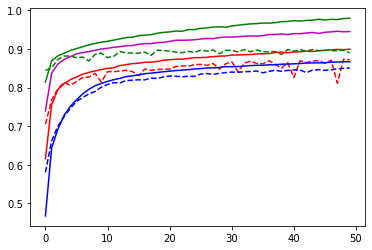

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop


# MNIST 읽어와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이펖 매개변수 설정
batch_siz=256
n_epoch=50

#모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# SGD 옵티마이저를 사용하는 모델
dmlp_sgd=build_model()
dmlp_sgd.compile(loss='categorical_crossentropy', optimizer=SGD(),metrics=['accuracy'])
hist_sgd=dmlp_sgd.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam=build_model()
dmlp_adam.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
hist_adam=dmlp_adam.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad=build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy', optimizer=Adagrad(),metrics=['accuracy'])
hist_adagrad=dmlp_adagrad.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop=build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
hist_rmsprop=dmlp_rmsprop.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# 네 모델의 정확률을 출력
print("SGD 정확률은",dmlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adam 정확률은",dmlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adagrad 정확률은",dmlp_adagrad.evaluate(x_test,y_test,verbose=0)[1]*100)
print("RMSprop 정확률은",dmlp_rmsprop.evaluate(x_test,y_test,verbose=0)[1]*100)

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')
plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')
plt.title("Model accuracy comparison between optimizers")
plt.ylim((0.6,1.0))
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train_sgd','Val_sgd','Train_adam','Val_adam','Train_adagrad','Val_adagrad','Train_rmsprop','Val_rmsprop'],loc="best")
plt.grid()
plt.show()


# 교차 검증을 이용한 옵티마이저 선택
## 교차 검증으로 성능 측정의 신뢰도를 높임

Epoch 1/50
188/188 - 4s - loss: 1.4681 - accuracy: 0.6166 - 4s/epoch - 21ms/step
Epoch 2/50
188/188 - 4s - loss: 0.7684 - accuracy: 0.7414 - 4s/epoch - 19ms/step
Epoch 3/50
188/188 - 4s - loss: 0.6453 - accuracy: 0.7852 - 4s/epoch - 19ms/step
Epoch 4/50
188/188 - 4s - loss: 0.5796 - accuracy: 0.8046 - 4s/epoch - 19ms/step
Epoch 5/50
188/188 - 4s - loss: 0.5428 - accuracy: 0.8139 - 4s/epoch - 20ms/step
Epoch 6/50
188/188 - 4s - loss: 0.5156 - accuracy: 0.8228 - 4s/epoch - 20ms/step
Epoch 7/50
188/188 - 4s - loss: 0.4943 - accuracy: 0.8278 - 4s/epoch - 20ms/step
Epoch 8/50
188/188 - 4s - loss: 0.4789 - accuracy: 0.8329 - 4s/epoch - 19ms/step
Epoch 9/50
188/188 - 4s - loss: 0.4597 - accuracy: 0.8400 - 4s/epoch - 20ms/step
Epoch 10/50
188/188 - 4s - loss: 0.4528 - accuracy: 0.8412 - 4s/epoch - 23ms/step
Epoch 11/50
188/188 - 4s - loss: 0.4406 - accuracy: 0.8470 - 4s/epoch - 23ms/step
Epoch 12/50
188/188 - 4s - loss: 0.4339 - accuracy: 0.8483 - 4s/epoch - 22ms/step
Epoch 13/50
188/188 - 4s 

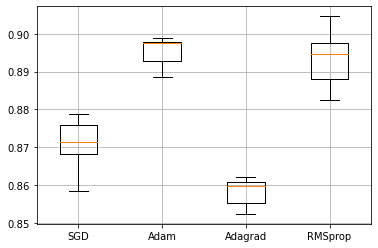

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold

# MNIST 읽어와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이펖 매개변수 설정
batch_siz=256
n_epoch=50
k=5 # 5-겹

#모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)
def cross_validation(opt):
    accuracy=[]
    # KFold 함수를 이용하여 훈련과 검증 집합으로 분할
    for train_index, val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]
        dmlp=build_model()
        dmlp.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        dmlp.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=2)
        accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd=cross_validation(SGD())
acc_adam=cross_validation(Adam())
acc_adagrad=cross_validation(Adagrad())
acc_rmsprop=cross_validation(RMSprop())

# 옵티마이저 4개의 정확률 비교
print("SGD: ",np.array(acc_sgd).mean())
print("Adam: ",np.array(acc_adam).mean())
print("Adagrad: ",np.array(acc_adagrad).mean())
print("RMSprop: ",np.array(acc_rmsprop).mean())

# 4개의 옵티마이저의 정확률을 박스플롯으로 비교 
plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()